In [1]:
!pip3 install torch torchvision

In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
from torch import nn
from torchvision import datasets, transforms

In [35]:
transform = transforms.Compose([
                                transforms.Resize((28,28)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,))])
training_dataset = datasets.MNIST(root = "./data", train = True, download = True, transform =transform)
validation_dataset = datasets.MNIST(root = "./data", train = False, download = True, transform =transform)

validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=100, shuffle = False)
training_loader = torch.utils.data.DataLoader(dataset=training_dataset, batch_size=100, shuffle = True)

In [4]:
def image_convert(tensor):
  image = tensor.clone().detach().numpy()
  image = image.transpose(1, 2, 0)
  image = image * np.array((0.5,0.5,0.5)) + np.array((0.5,0.5,0.5))
  image = image.clip(0, 1)
  return image

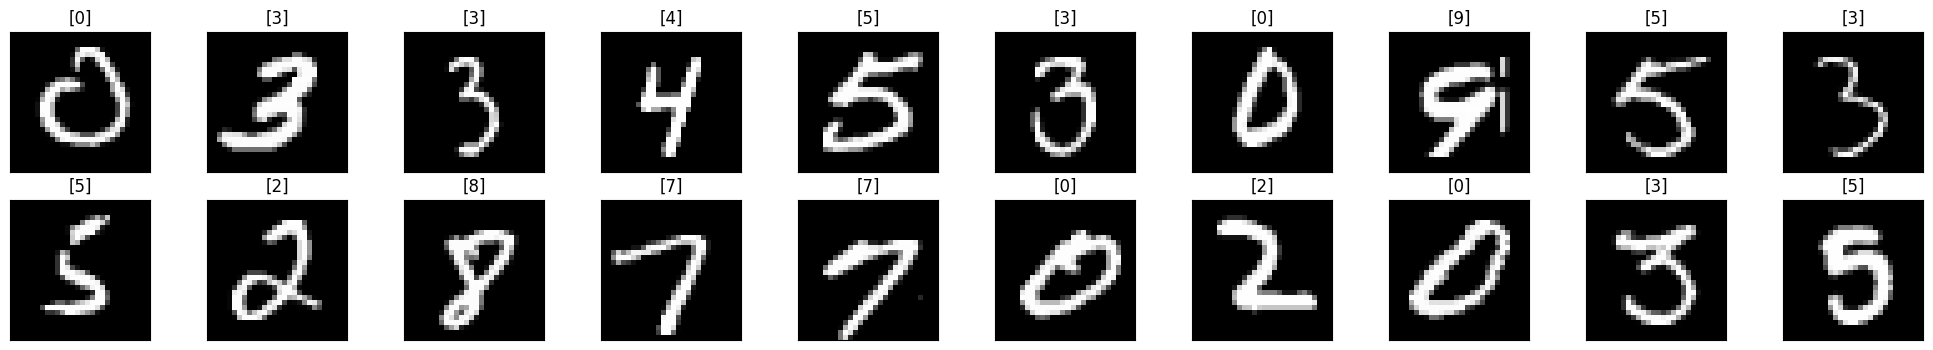

In [5]:
dataIter = iter(training_loader)
images, labels = next(dataIter)
fig = plt.figure(figsize=(25,4))

for idx in np.arange(20):
  ax = fig.add_subplot(2,10, idx+1, xticks = [],yticks = [])
  plt.imshow(image_convert(images[idx]))
  ax.set_title([labels[idx].item()])

In [21]:
class Classifier(nn.Module):
  def __init__(self, n_in, H1, H2, n_out):
    super().__init__()
    self.linear1 = nn.Linear(n_in, H1)
    self.linear2 = nn.Linear(H1, H2)
    self.linear3 = nn.Linear(H2, n_out)
  def forward(self, x):
    x = F.relu(self.linear1(x))
    x = F.relu(self.linear2(x))
    x = self.linear3(x)
    return x

In [22]:
model = Classifier(784, 125, 65, 10)
model

Classifier(
  (linear1): Linear(in_features=784, out_features=125, bias=True)
  (linear2): Linear(in_features=125, out_features=65, bias=True)
  (linear3): Linear(in_features=65, out_features=10, bias=True)
)

In [23]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)

In [24]:
epochs = 20
running_loss_history = []
running_corrects_history = []
val_running_loss_history = []
val_running_corrects_history = []



for e in range(epochs):
  running_loss = 0.0
  running_corrects = 0.0
  val_running_loss = 0.0
  val_running_corrects = 0.0
  for inputs, labels in training_loader:
    inputs = inputs.view(inputs.shape[0],-1)
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    _, preds = torch.max(outputs,1)
    running_corrects += torch.sum(preds == labels.data)

    running_loss += loss.item()
  else:
    with torch.no_grad():
      for val_inputs, val_labels in validation_loader:
        val_inputs = val_inputs.view(val_inputs.shape[0],-1)
        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs,val_labels)

        _, val_preds = torch.max(val_outputs, 1)
        val_running_loss += val_loss.item()
        val_running_corrects += torch.sum(val_preds == val_labels.data)


      val_epoch_loss = val_running_loss/len(validation_loader)
      val_epoch_accuracy = val_running_corrects.float()/len(validation_loader)
      val_running_corrects_history.append(val_epoch_accuracy)
      val_running_loss_history.append(val_epoch_loss)




    epoch_loss = running_loss/len(training_loader)
    epoch_accuracy = running_corrects.float()/len(training_loader)
    running_loss_history.append(epoch_loss)
    running_corrects_history.append(epoch_accuracy)

    print("Epoch: {}".format(e))
    print("Training Loss: {:.4f}, acc: {:.4f}".format(epoch_loss,epoch_accuracy.item()))
    print("Validation Loss: {:.4f}, acc: {:.4f}".format(val_epoch_loss,val_epoch_accuracy.item()))


Epoch: 0
Training Loss: 0.9220, acc: 78.2583
Validation Loss: 0.4031, acc: 89.5800
Epoch: 1
Training Loss: 0.3642, acc: 89.7583
Validation Loss: 0.3124, acc: 91.1400
Epoch: 2
Training Loss: 0.3076, acc: 91.0983
Validation Loss: 0.2761, acc: 92.2200
Epoch: 3
Training Loss: 0.2756, acc: 92.0117
Validation Loss: 0.2518, acc: 92.7700
Epoch: 4
Training Loss: 0.2511, acc: 92.7233
Validation Loss: 0.2308, acc: 93.3400
Epoch: 5
Training Loss: 0.2299, acc: 93.4100
Validation Loss: 0.2166, acc: 93.6500
Epoch: 6
Training Loss: 0.2116, acc: 93.9233
Validation Loss: 0.1999, acc: 94.1600
Epoch: 7
Training Loss: 0.1958, acc: 94.3650
Validation Loss: 0.1929, acc: 94.1900
Epoch: 8
Training Loss: 0.1812, acc: 94.7283
Validation Loss: 0.1738, acc: 94.9800
Epoch: 9
Training Loss: 0.1684, acc: 95.1733
Validation Loss: 0.1623, acc: 95.1600
Epoch: 10
Training Loss: 0.1574, acc: 95.4600
Validation Loss: 0.1546, acc: 95.4200
Epoch: 11
Training Loss: 0.1470, acc: 95.7050
Validation Loss: 0.1463, acc: 95.6700
Ep

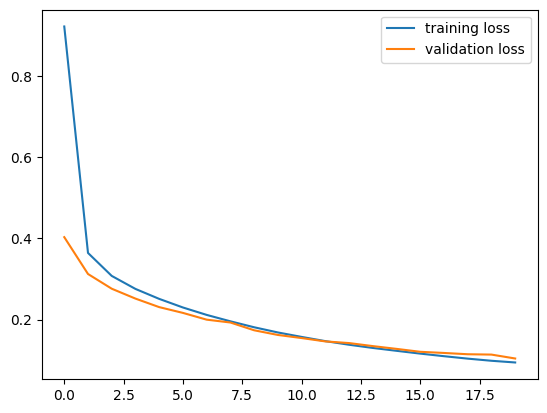

In [25]:
plt.plot(running_loss_history, label = "training loss")
plt.plot(val_running_loss_history,label="validation loss")
plt.legend()

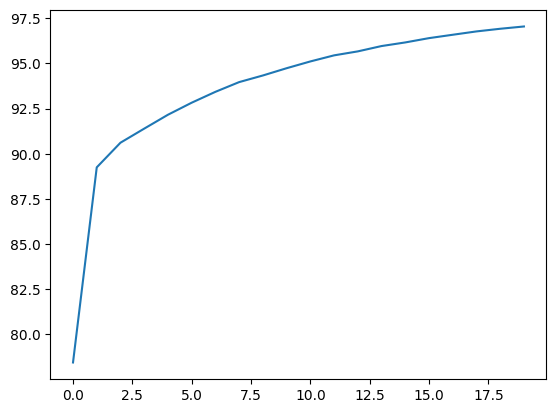

In [57]:
plt.plot(running_corrects_history,label = "Training_Accuracy")

<Response [200]>


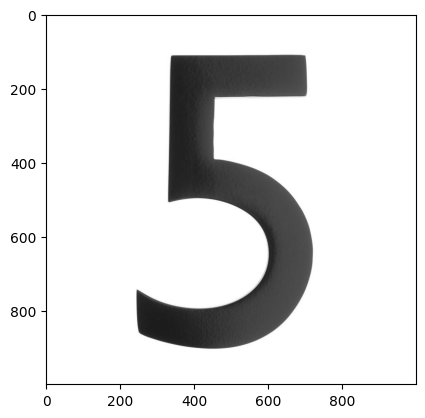

In [40]:
import requests
import PIL
from PIL import Image
url = "https://images.homedepot-static.com/productImages/007164ea-d47e-4f66-8d8c-fd9f621984a2/svn/architectural-mailboxes-house-letters-numbers-3585b-5-64_1000.jpg"
response = requests.get(url,stream = True)
img = Image.open(response.raw)
print(response)
plt.imshow(img)

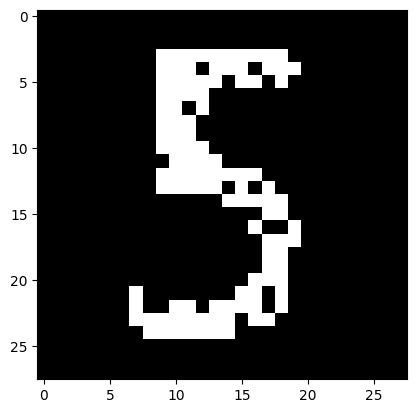

In [42]:
img2 = PIL.ImageOps.invert(img)
img2 = img2.convert('1')
img2 = transform(img2)
plt.imshow(image_convert(img2))

In [44]:
img2 = img2.view(img2.shape[0],-1)
output = model(img2)
_, pred = torch.max(output,1)
print(pred.item())

5


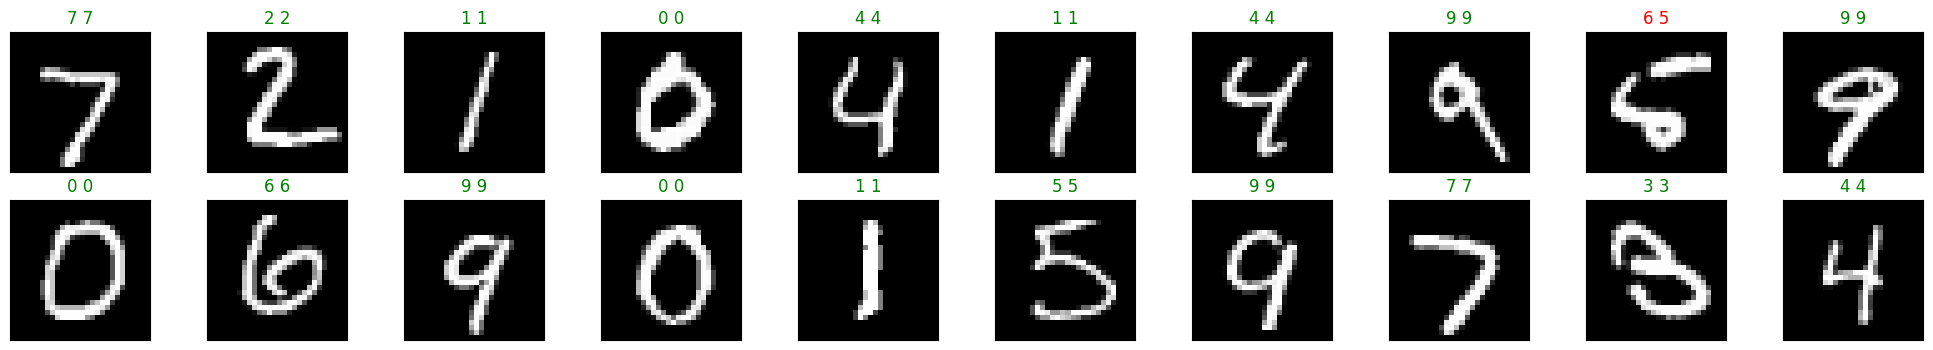

In [47]:
dataIter = iter(validation_loader)
images, labels = next(dataIter)
images_ = images.view(images.shape[0],-1)
output = model(images_)
_, preds = torch.max(output,1)

fig = plt.figure(figsize=(25,4))

for idx in np.arange(20):
  ax = fig.add_subplot(2,10, idx+1, xticks = [],yticks = [])
  plt.imshow(image_convert(images[idx]))
  ax.set_title("{} {}".format(str(preds[idx].item()),str(labels[idx].item())),color=("green" if preds[idx] == labels[idx] else "red"))